In [731]:
# libraries needed
# refer to README in Github repository for additional dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [732]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# LISTINGS DATA

In [1587]:
df_listings = pd.read_csv('listings.csv')

df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [1588]:
df_listings.shape

(3818, 92)

# Data Analysis

In [1589]:
pd.DataFrame(np.sum(df_listings.isnull()), columns=['null_count']).sort_values(by='null_count', ascending=False)

,null_count
license,3818
square_feet,3721
monthly_price,2301
security_deposit,1952
weekly_price,1809
notes,1606
neighborhood_overview,1032
cleaning_fee,1030
transit,934
host_about,859


In [1590]:
# Cleaning Price field
df_listings[['price']].head()

,price
0,$85.00
1,$150.00
2,$975.00
3,$100.00
4,$450.00


In [1591]:
df_listings['price'] = df_listings['price'].str.replace("[$, ]", "").astype('float')
print(df.price.describe())

count    3817.000000
mean      127.978255
std        90.261754
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64


In [1592]:
#  Analyzing Calendar table
df_calendar = pd.read_csv('calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [1593]:
# Calendar Clean Up
df_calendar['year'] = pd.DatetimeIndex(df_calendar['date']).year
df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month
df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Price over time

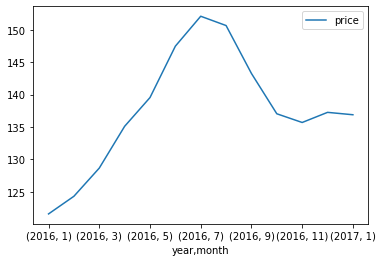

In [1503]:
df_calendar.groupby(['year','month'])[['price']].mean().plot(kind="line");

# Price by Neighbourhood

In [1594]:
df_neighbourhood = pd.DataFrame(df_listings.groupby('neighbourhood_cleansed').mean()['price'].sort_values(ascending=False))
df_neighbourhood = df_neighbourhood.rename(columns = {'price': 'mean_price'})

top_10 = df_neighbourhood.index[:10].tolist()

df_neighbourhood.head(10)

,mean_price
neighbourhood_cleansed,
Southeast Magnolia,231.705882
Portage Bay,227.857143
Westlake,194.470588
West Queen Anne,187.769231
Montlake,182.789474
Briarcliff,176.571429
Sunset Hill,176.055556
Industrial District,173.333333
Alki,171.619048


In [1595]:
# Distribution of Price by Neighbourhood
boxplot = []

for neighbourhood in top_10:
    trace = go.Box(x = df.loc[df_listings['neighbourhood_cleansed'] == neighbourhood].price.tolist(), name = neighbourhood)
    boxplot.append(trace)

box_layout = go.Layout(xaxis = dict(title='Listing Price'))
box_fig = go.Figure(data=box_data, layout=box_layout)

box_fig.show()

In [1596]:
#Distribution by property type
df_stack_plot = pd.DataFrame(df_listings.loc[df_listings['neighbourhood_cleansed'].isin(top_10) ].groupby(['neighbourhood_cleansed', 'property_type']).count()['id']).reset_index()
property_type_list = df_stack_plot.property_type.unique().tolist()

stacked_plot = []

for property_type in property_type_list:
        stack = go.Bar(name = property_type, x= top_10, y =stacked_bar_df[stacked_bar_df['property_type']== property_type]['id'].tolist())
        stacked_plot.append(stack)
        
stacked_layout = go.Layout(title = 'Property Type Count in Top 10 Most Expensive Neighborhoods',
                   barmode = 'stack',
                  yaxis = dict(title='Count'))    
    
stacked_fig = go.Figure(data=stacked_plot, layout=stacked_layout)

stacked_fig.show()

# Sentiment Analysis

In [577]:

df_reviews = pd.read_csv('reviews.csv')
df_comments = df_reviews[['listing_id', 'comments']].copy()
df_comments.head()

,listing_id,comments
0,7202016,Cute and cozy place. Perfect location to every...
1,7202016,Kelly has a great room in a very central locat...
2,7202016,"Very spacious apartment, and in a great neighb..."
3,7202016,Close to Seattle Center and all it has to offe...
4,7202016,Kelly was a great host and very accommodating ...


In [578]:
df_listings_short = df_listings[["id", "neighbourhood_cleansed"]]

In [579]:
df_listings_short.head()

,id,neighbourhood_cleansed
0,241032,West Queen Anne
1,953595,West Queen Anne
2,3308979,West Queen Anne
3,7421966,West Queen Anne
4,278830,West Queen Anne


In [583]:
df_listings_short.rename(columns={"id" : "listing_id"}, inplace=True)

In [581]:
df_comm  = pd.merge(left=df_comments,right=df_listings_short, how='inner',      left_on='listing_id', right_on='listing_id')

In [582]:
df_comm["comments"] = df_comm["comments"].astype(str)

In [203]:
#def get_neighborhood(listing_id):
  
    #neighbourhood = df_listings.loc[df_listings['id'] == listing_id, 'neighbourhood_cleansed'].iloc[0]
    #return neighbourhood

# Apply get_neighborhood function to the listing ids
#df_comments['neighbourhood'] = df_comments['listing_id'].apply(get_neighborhood)
#df_comments.head()

# #  Text Blob

In [1506]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [1507]:
desc_blob = [TextBlob(desc) for desc in df_comm['comments']]
df_comm['tb_Pol'] = [b.sentiment.polarity for b in desc_blob]
df_comm['tb_Subj'] = [b.sentiment.subjectivity for b in desc_blob]
df_comm

,listing_id,comments,neighbourhood_cleansed,tb_Pol,tb_Subj
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,0.433333,0.916667
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,0.301136,0.493182
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,0.410417,0.610417
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne,0.358333,0.508333
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne,0.493485,0.509091
...,...,...,...,...,...
84844,3624990,The description and pictures of the apartment ...,First Hill,0.194844,0.550312
84845,3624990,We had an excellent stay. It was clean and com...,First Hill,0.311111,0.538889
84846,3624990,"Gran ubicación, cerca de todo lo atractivo del...",First Hill,0.000000,0.000000
84847,3624990,"Very good apartement, clean and well sized. Si...",First Hill,0.216852,0.383889


In [1511]:
df_comm['tb_Pol']

0        0.433333
1        0.301136
2        0.410417
3        0.358333
4        0.493485
           ...   
84844    0.194844
84845    0.311111
84846    0.000000
84847    0.216852
84848    0.367302
Name: tb_Pol, Length: 84849, dtype: float64

# # VADER

In [1514]:
df_comm_vader  = pd.merge(left=df_comments,right=df_listings_short, how='inner',      left_on='listing_id', right_on='listing_id')

In [1515]:
df_comm_vader["comments"] = df_comm_vader["comments"].astype(str)

In [1516]:
analyzer = SentimentIntensityAnalyzer()
df_comm_vader['compound'] = [analyzer.polarity_scores(v)['compound'] for v in df_comm_vader['comments']]
#df_comm_vader['neg'] = [analyzer.polarity_scores(v)['neg'] for v in df_comm_vader['comments']]
#df_comm_vader['neu'] = [analyzer.polarity_scores(v)['neu'] for v in df_comm_vader['comments']]
#df_comm_vader['pos'] = [analyzer.polarity_scores(v)['pos'] for v in df_comm_vader['comments']]

In [1517]:
df_comm_vader.head()

,listing_id,comments,neighbourhood_cleansed,compound
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,0.7901
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,0.9875
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,0.8718
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne,0.8313
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne,0.9783


# Function for Reference

In [ ]:
#df_comm_vad1  = pd.merge(left=df_comments,right=df_listings_short, how='inner',      left_on='listing_id', right_on='listing_id').head()

#analyser = SentimentIntensityAnalyzer()

#def sentiment_analyzer_scores(comment):
    '''
    Function to run sentiment intensity analyzer on a sentence and return compound polarity score
    INPUT:
    sentence - the text of the review comments 
    OUTPUT:
    score['compound'] - the compound score combining the positive, negative and neutral scores
    
    Provides the compound score for a particular sentence for sentiment analysis
    '''
    #sentence = str(comment)
    #score = analyser.polarity_scores(comment)
    #return score['compound']


#df_comm_vad1['polarity_score'] = df_comm_vad1['comments'].apply(sentiment_analyzer_scores)
#df_comm_vad1.head()


# Plot of Sentiment by Neighborhood

In [1513]:
# Text Blob Plot
df_comm['tb_Pol']
n_polarity_comm = df_comm.groupby('neighbourhood_cleansed')[['tb_Pol']].mean().sort_values(by='tb_Pol',ascending=False)

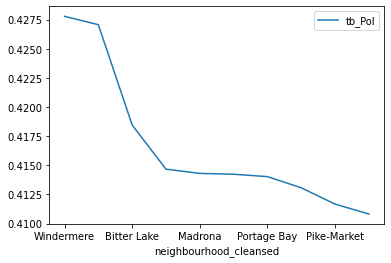

In [1519]:
n_polarity_comm.head(10).plot(kind='line');

In [1518]:
# VADER Plot
n_polarity_vader = df_comm_vader.groupby('neighbourhood_cleansed')[['compound']].mean().sort_values(by='compound',ascending=False)

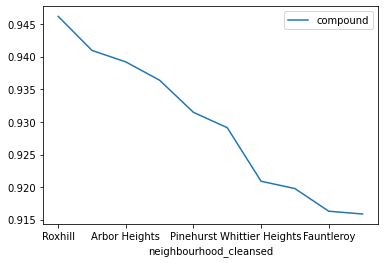

In [1597]:
n_polarity_vader.head(10).plot(kind='line');

In [290]:
# Neighborhoods at the bottom based on Sentiments
df_comm_vader.sort_values(by='compound',ascending=False).tail(10)

,listing_id,comments,neighbourhood_cleansed,compound,neg,neu
14908,685600,Das Zimmer war wie beschrieben und die Umgebun...,Lawton Park,-0.9885,0.161,0.823
1786,208356,Die Unterkunft ist so wie beschrieben und die ...,International District,-0.9892,0.297,0.703
36603,189156,Although this unit was in a very nice part of ...,Seaview,-0.9904,0.158,0.799
68659,9519968,Do NOT rent this house if you are not the clea...,Montlake,-0.9906,0.151,0.816
18347,26116,Für den Aufenthalt in einer fremdem Stadt hatt...,Broadway,-0.9927,0.135,0.865
75564,1775016,Staying at Robert’s place was a nightmare. At ...,Broadway,-0.9941,0.117,0.866
32404,3291777,Melissa replied to our request and approved bu...,University District,-0.9956,0.153,0.808
84378,4577542,"Die Unterkunft war sehr schön und genau so, wi...",Minor,-0.9961,0.309,0.691
29434,1018204,"leider war esnicht so fein, da die unterkunft ...",Minor,-0.9967,0.258,0.729
50261,258571,Wir sind 5 Nächte geblieben. Und es ist eine A...,Broadway,-0.9973,0.183,0.798


# Clean Data and Select Subset of Features

In [1605]:
df_list = df_listings.copy()

In [1606]:
cols_Not_Useful = ['id','listing_url','scrape_id','last_scraped','thumbnail_url','medium_url','xl_picture_url',
                   'host_id','host_url','host_thumbnail_url','host_verifications','street','neighbourhood',
                   'neighbourhood_group_cleansed','zipcode','smart_location','country','latitude',
                   'longitude','weekly_price','monthly_price','calendar_updated','calendar_last_scraped',
                   'first_review','last_review','calculated_host_listings_count']
df_list = df_list.drop(cols_Not_Useful, axis=1)
df_list.shape

(3818, 66)

In [1607]:
df_list.columns

Index(['name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'picture_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'city', 'state',
       'market', 'country_code', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_acc

In [1608]:
# Identifying a subset of the fields in the list
df_sub = df_list[["host_is_superhost",'cancellation_policy','instant_bookable', "price", 'reviews_per_month','host_response_time',
     'amenities', 'host_response_rate']]

In [1609]:
# Checking the data in Host Reponse Rate
df_sub['host_response_rate']

0        96%
1        98%
2        67%
3        NaN
4       100%
        ... 
3813     99%
3814    100%
3815     NaN
3816    100%
3817    100%
Name: host_response_rate, Length: 3818, dtype: object

In [1610]:
# Cleaning Host Response Rate
df_sub['host_response_rate'] = df_sub['host_response_rate'].apply(lambda x: 0 if x == 'N/A' else x)
df_sub['host_response_rate'] = df_sub['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
df_sub['host_response_rate'] = df_sub['host_response_rate'].fillna(0)

D:\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [1611]:
#Filter data by response rate of greater than 90%
df_sub = df_sub[df_sub['host_response_rate'] > 90] 

In [1612]:
#Filter data by response time = within a few hours
df_sub = df_sub[df_sub['host_response_time'] == 'within a few hours']

In [1613]:
df_sub

,host_is_superhost,cancellation_policy,instant_bookable,price,reviews_per_month,host_response_time,amenities,host_response_rate
0,f,moderate,f,85.0,4.07,within a few hours,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",96.0
10,t,moderate,f,95.0,3.33,within a few hours,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",100.0
11,f,strict,f,99.0,0.98,within a few hours,"{TV,""Cable TV"",""Wireless Internet"",Kitchen,""Fr...",100.0
15,f,strict,f,109.0,0.73,within a few hours,"{TV,""Cable TV"",Internet,Kitchen,""Free Parking ...",100.0
20,f,flexible,f,110.0,1.00,within a few hours,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",100.0
...,...,...,...,...,...,...,...,...
3803,f,moderate,f,250.0,4.00,within a few hours,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",97.0
3804,t,strict,f,125.0,2.34,within a few hours,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...",100.0
3808,f,strict,f,175.0,1.15,within a few hours,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",100.0
3811,f,moderate,f,65.0,0.63,within a few hours,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",100.0


# Clean Up Amenities

In [1614]:
# Identify the top amenities
from collections import Counter
amenities = []
for index, row in df_list.iterrows():
    row['amenities'] = row['amenities'].replace('{','')
    row['amenities'] = row['amenities'].replace('}','')
    row['amenities'] = row['amenities'].replace('"','')
    mylist = row['amenities'].split(',')
    for l in mylist:
        amenities.append(l)
    
amenities_count = Counter(amenities)
amenities_count.most_common()

[('Wireless Internet', 3667),
 ('Heating', 3627),
 ('Kitchen', 3423),
 ('Smoke Detector', 3281),
 ('Essentials', 3237),
 ('Dryer', 2997),
 ('Washer', 2992),
 ('Internet', 2811),
 ('Shampoo', 2670),
 ('TV', 2574),
 ('Carbon Monoxide Detector', 2485),
 ('Fire Extinguisher', 2196),
 ('Free Parking on Premises', 2167),
 ('Family/Kid Friendly', 1963),
 ('First Aid Kit', 1680),
 ('Cable TV', 1446),
 ('Indoor Fireplace', 886),
 ('Pets live on this property', 883),
 ('Hangers', 846),
 ('Elevator in Building', 785),
 ('Hair Dryer', 774),
 ('Laptop Friendly Workspace', 745),
 ('Iron', 742),
 ('Safety Card', 727),
 ('Air Conditioning', 677),
 ('24-Hour Check-in', 616),
 ('Buzzer/Wireless Intercom', 538),
 ('Dog(s)', 509),
 ('Pets Allowed', 472),
 ('Gym', 442),
 ('Cat(s)', 382),
 ('Hot Tub', 303),
 ('Wheelchair Accessible', 300),
 ('Breakfast', 291),
 ('Suitable for Events', 209),
 ('Pool', 159),
 ('Lock on Bedroom Door', 100),
 ('Doorman', 85),
 ('Smoking Allowed', 82),
 ('Other pet(s)', 51),
 ('

In [1615]:
# Clean Amenities field and pick the top ones

amenities_new_cols =['amenities_wireless_internet|Wireless Internet','amenities_heating|Heating','amenities_kitchen|Kitchen','amenities_smoke_detector|Smoke Detector','amenities_essentials|Essentials','amenities_dryer|Dryer','amenities_washer|Washer','amenities_internet|Internet','amenities_shampoo|Shampoo','amenities_tv|TV','amenities_carbon_monoxide_detector|Carbon Monoxide Detector','amenities_fire_extinguisher|Fire Extinguisher','amenities_free_parking|Free Parking on Premises']
for c in amenities_new_cols:
    c_colname,c_desc = c.split('|')
    df_sub[c_colname] = df_sub['amenities'].apply(lambda x: 1 if c_desc in x else 0)

In [1616]:
df_sub = df_sub.drop('amenities', axis = 1)
df_sub

,host_is_superhost,cancellation_policy,instant_bookable,price,reviews_per_month,host_response_time,host_response_rate,amenities_wireless_internet,amenities_heating,amenities_kitchen,amenities_smoke_detector,amenities_essentials,amenities_dryer,amenities_washer,amenities_internet,amenities_shampoo,amenities_tv,amenities_carbon_monoxide_detector,amenities_fire_extinguisher,amenities_free_parking
0,f,moderate,f,85.0,4.07,within a few hours,96.0,1,1,1,0,0,1,1,1,0,1,0,0,0
10,t,moderate,f,95.0,3.33,within a few hours,100.0,1,1,1,1,1,1,1,1,1,1,1,1,1
11,f,strict,f,99.0,0.98,within a few hours,100.0,1,1,1,1,1,0,0,1,1,1,1,1,1
15,f,strict,f,109.0,0.73,within a few hours,100.0,0,1,1,1,1,1,1,1,0,1,1,1,1
20,f,flexible,f,110.0,1.00,within a few hours,100.0,1,1,1,1,1,0,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803,f,moderate,f,250.0,4.00,within a few hours,97.0,1,1,1,1,1,1,0,1,1,1,1,1,1
3804,t,strict,f,125.0,2.34,within a few hours,100.0,1,1,1,1,1,1,0,1,1,1,1,1,0
3808,f,strict,f,175.0,1.15,within a few hours,100.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3811,f,moderate,f,65.0,0.63,within a few hours,100.0,1,1,1,1,1,1,1,1,1,1,0,0,0


# Adding Dummies for Categorical fields

In [1617]:
# Dummies for Categorical fields
cat_cols = df_sub.select_dtypes(include=['object']).columns
cat_cols

Index(['host_is_superhost', 'cancellation_policy', 'instant_bookable',
       'host_response_time'],
      dtype='object')

In [1618]:
#cat_fields = df.select_dtypes(include=['object']).columns  
for var in cat_cols:
    df_sub = pd.concat([df_sub.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

In [1619]:
pd.DataFrame(df_sub)

,price,reviews_per_month,host_response_rate,amenities_wireless_internet,amenities_heating,amenities_kitchen,amenities_smoke_detector,amenities_essentials,amenities_dryer,amenities_washer,amenities_internet,amenities_shampoo,amenities_tv,amenities_carbon_monoxide_detector,amenities_fire_extinguisher,amenities_free_parking,host_is_superhost_t,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,85.0,4.07,96.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0,0,0,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,1,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,359.0,0.30,99.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0,0,1,0,0,0,1,0
3814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,1
3815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0
3816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,1


# Feature Selection -- Pearson Correlation

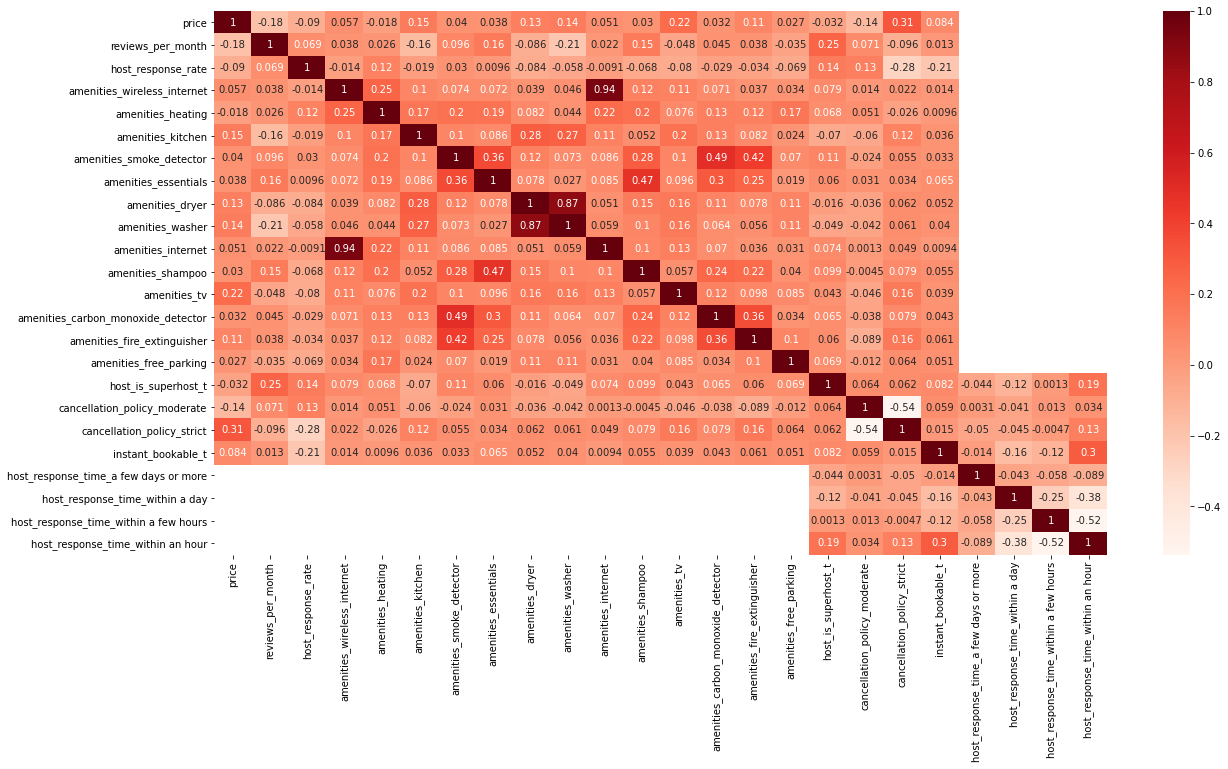

In [1620]:
#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df_sub.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Feature Selection on the superset of fields

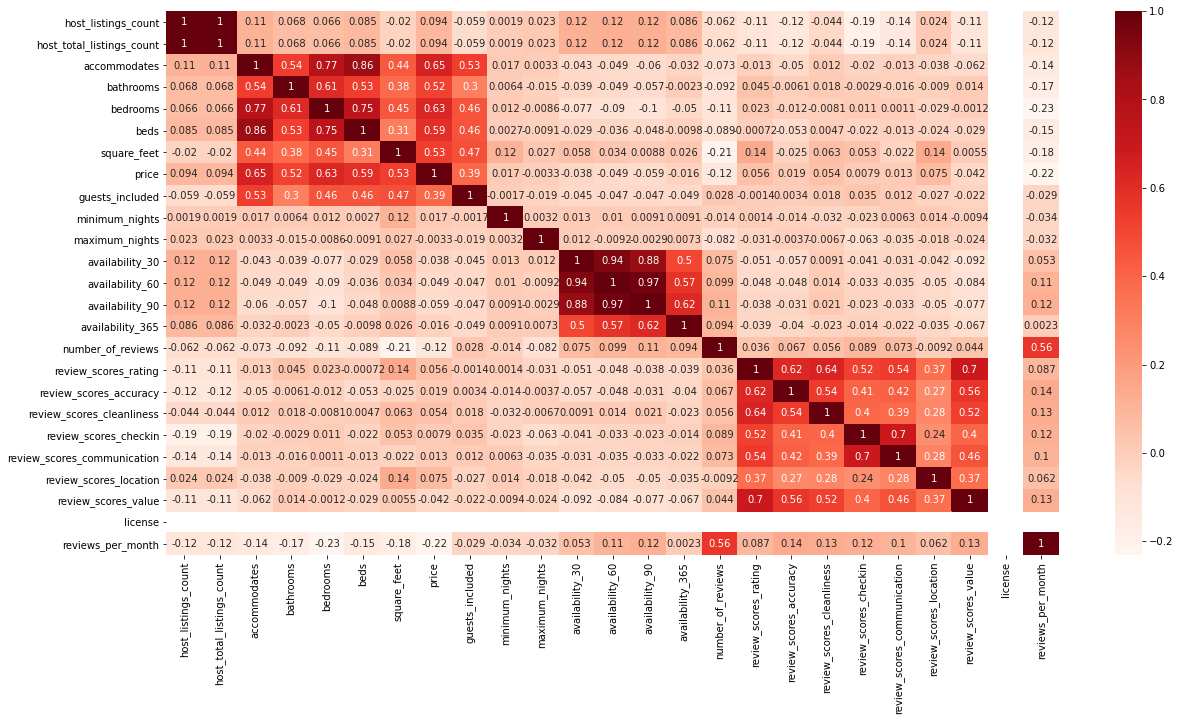

In [1622]:
#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df_list.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Subset of fields based on the above analysis

In [1623]:
df_list = df_list[[ "neighbourhood_cleansed","guests_included", "property_type","room_type", "accommodates", "bathrooms", "bedrooms", 
               "beds", "price", "number_of_reviews", "cancellation_policy", 'security_deposit',
               "reviews_per_month", 'cleaning_fee', 'amenities']]

In [ ]:
#df_list['availability_30'].dtypes

# Clean Data Again

In [1624]:
df_list['security_deposit'].dtypes

dtype('O')

In [1625]:
df_list.columns[df_list.isnull().all()].tolist()

[]

In [1626]:
df_list[['security_deposit', 'property_type', 'cleaning_fee']].head()

,security_deposit,property_type,cleaning_fee
0,NaN,Apartment,NaN
1,$100.00,Apartment,$40.00
2,"$1,000.00",House,$300.00
3,NaN,Apartment,NaN
4,$700.00,House,$125.00


In [ ]:
#del df_list["license"]
#df_list = df_list.drop(['experiences_offered','market','jurisdiction_names',], axis = 1)

In [1627]:
# Clean up Security Deposit by removing nulls and replacing them with 0
df_list['security_deposit'] = df_list['security_deposit'].replace(np.nan, '', regex=True)
df_list['security_deposit'] = df['security_deposit'].fillna(0)
df_list['security_deposit'] = df_list['security_deposit'].replace(np.nan, 0)
df_list['security_deposit']

0          0.0
1        100.0
2       1000.0
3          0.0
4        700.0
         ...  
3813       0.0
3814     500.0
3815     250.0
3816     300.0
3817       0.0
Name: security_deposit, Length: 3818, dtype: float64

In [1628]:
# Test
bool_series = pd.isnull(df_list['security_deposit'])
df_list[bool_series]

,neighbourhood_cleansed,guests_included,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,cancellation_policy,security_deposit,reviews_per_month,cleaning_fee,amenities


In [1629]:
# Clean up Cleaning Fee by removing nulls and replacing them with 0
df_list['cleaning_fee'] = df_list['cleaning_fee'].replace(np.nan, '', regex=True)
df_list['cleaning_fee'] = df['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
df_list['cleaning_fee'] = df_list['cleaning_fee'].replace(np.nan, 0)
df_list['cleaning_fee']

0         0.0
1        40.0
2       300.0
3         0.0
4       125.0
        ...  
3813    230.0
3814     50.0
3815     35.0
3816     45.0
3817      0.0
Name: cleaning_fee, Length: 3818, dtype: float64

In [1630]:
# Test
bool_series = pd.isnull(df_list['cleaning_fee'])
df_list[bool_series]

,neighbourhood_cleansed,guests_included,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,cancellation_policy,security_deposit,reviews_per_month,cleaning_fee,amenities


In [1631]:
# Cleaning Property Type
df_list['property_type'].unique()


array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent', nan],
      dtype=object)

In [1632]:
df_list['property_type'] = df_list['property_type'].replace(np.nan, "none")

# Amenities Clean up Again

In [1633]:
# Clean Amenities field and pick the top ones

amenities_new_cols =['amenities_wireless_internet|Wireless Internet','amenities_heating|Heating','amenities_kitchen|Kitchen','amenities_smoke_detector|Smoke Detector','amenities_essentials|Essentials','amenities_dryer|Dryer','amenities_washer|Washer','amenities_internet|Internet','amenities_shampoo|Shampoo','amenities_tv|TV','amenities_carbon_monoxide_detector|Carbon Monoxide Detector','amenities_fire_extinguisher|Fire Extinguisher','amenities_free_parking|Free Parking on Premises']
for c in amenities_new_cols:
    c_colname,c_desc = c.split('|')
    df_list[c_colname] = df_list['amenities'].apply(lambda x: 1 if c_desc in x else 0)

In [1634]:
df_list = df_list.drop('amenities', axis = 1)
df_list

,neighbourhood_cleansed,guests_included,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,cancellation_policy,security_deposit,reviews_per_month,cleaning_fee,amenities_wireless_internet,amenities_heating,amenities_kitchen,amenities_smoke_detector,amenities_essentials,amenities_dryer,amenities_washer,amenities_internet,amenities_shampoo,amenities_tv,amenities_carbon_monoxide_detector,amenities_fire_extinguisher,amenities_free_parking
0,West Queen Anne,2,Apartment,Entire home/apt,4,1.0,1.0,1.0,85.0,207,moderate,0.0,4.07,0.0,1,1,1,0,0,1,1,1,0,1,0,0,0
1,West Queen Anne,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,150.0,43,strict,100.0,1.48,40.0,1,1,1,1,1,1,1,1,0,1,1,1,1
2,West Queen Anne,10,House,Entire home/apt,11,4.5,5.0,7.0,975.0,20,strict,1000.0,1.15,300.0,1,1,1,1,1,1,1,1,1,1,1,0,1
3,West Queen Anne,1,Apartment,Entire home/apt,3,1.0,0.0,2.0,100.0,0,flexible,0.0,NaN,0.0,1,1,1,1,1,1,1,1,1,0,1,1,0
4,West Queen Anne,6,House,Entire home/apt,6,2.0,3.0,3.0,450.0,38,strict,700.0,0.89,125.0,1,1,1,1,1,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,Fremont,1,House,Entire home/apt,6,2.0,3.0,3.0,359.0,1,strict,0.0,0.30,230.0,1,1,1,1,1,1,1,1,1,1,0,1,1
3814,Portage Bay,3,Apartment,Entire home/apt,4,1.0,1.0,2.0,79.0,2,moderate,500.0,2.00,50.0,1,1,1,1,1,1,0,1,1,1,0,1,1
3815,Rainier Beach,2,House,Entire home/apt,2,1.0,1.0,1.0,93.0,0,moderate,250.0,NaN,35.0,1,1,1,1,1,1,1,1,0,1,0,1,1
3816,Madison Park,1,Condominium,Entire home/apt,2,1.0,0.0,1.0,99.0,0,moderate,300.0,NaN,45.0,1,1,1,1,1,1,0,1,0,1,0,0,1


In [1635]:
# Checking numeric columns for null values
num_cols = df_list.select_dtypes(include=['float', 'int', 'int64']).columns
for col in num_cols:
    print(col,df_list[col].isnull().sum())

guests_included 0
accommodates 0
bathrooms 16
bedrooms 6
beds 1
price 0
number_of_reviews 0
security_deposit 0
reviews_per_month 627
cleaning_fee 0
amenities_wireless_internet 0
amenities_heating 0
amenities_kitchen 0
amenities_smoke_detector 0
amenities_essentials 0
amenities_dryer 0
amenities_washer 0
amenities_internet 0
amenities_shampoo 0
amenities_tv 0
amenities_carbon_monoxide_detector 0
amenities_fire_extinguisher 0
amenities_free_parking 0


In [1489]:
#df_list.columns

Index(['neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews',
       'cancellation_policy', 'security_deposit', 'reviews_per_month',
       'cleaning_fee', 'amenities_wireless_internet', 'amenities_heating',
       'amenities_kitchen', 'amenities_smoke_detector', 'amenities_essentials',
       'amenities_dryer', 'amenities_washer', 'amenities_internet',
       'amenities_shampoo', 'amenities_tv',
       'amenities_carbon_monoxide_detector', 'amenities_fire_extinguisher',
       'amenities_free_parking'],
      dtype='object')

In [1490]:
#df_list.select_dtypes(include=['float', 'int', 'int64']).columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'number_of_reviews', 'security_deposit', 'reviews_per_month',
       'cleaning_fee', 'amenities_wireless_internet', 'amenities_heating',
       'amenities_kitchen', 'amenities_smoke_detector', 'amenities_essentials',
       'amenities_dryer', 'amenities_washer', 'amenities_internet',
       'amenities_shampoo', 'amenities_tv',
       'amenities_carbon_monoxide_detector', 'amenities_fire_extinguisher',
       'amenities_free_parking'],
      dtype='object')

Index(['neighbourhood_cleansed', 'property_type', 'room_type',
       'cancellation_policy'],
      dtype='object')

In [ ]:
#df_list = df_list.drop(['experiences_offered','market','jurisdiction_names',], axis = 1)
#spike_cols = [col for col in X.columns if 'amenities' in col]
#print(list(X.columns))
#print(spike_cols)

In [1353]:
 '''
   def set_bool_text(textdata):
       if not textdata:
            return 0
        else:
            return 1
    
    text_host_fields = ['summary','space','neighborhood_overview','notes','transit','name','description','picture_url','host_name','host_since','host_location','host_about','host_picture_url','host_neighbourhood']
    for t in text_host_fields:
        df_list[t] = df_list[t].apply(set_bool_text)
    
    
        def set_bool_tf(tfdata):
        if tfdata == 't':
            return 1
        else:
            return 0
        
    tf_fields = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','has_availability','requires_license','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
    for t in tf_fields:
        df_list[t] = df_list[t].apply(set_bool_tf)
         ''' 

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 19)

# Function to Clean Data by replacing Nulls and Adding dummies

In [1636]:

def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - Independent Variables
    y - Dependent Variable
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Select the numeric variables in the dataset
    2. Impute Mean to fill null values for numeric variables
    3. Select the categorical variables
    4. Creates dummy columns for the categorical variables
    5. Create X as all columns except Price
    6. Create y as Price column
    '''
    num_vars= df.select_dtypes(include=['int','float', 'int64']).copy().columns

   
    for var in num_vars:
        df[var].fillna((df[var].mean()), inplace=True)       
    
# Assign N/A to applicable host fields
    #df['host_response_time'] = df['host_response_time'].fillna('N/A')
    #df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna('N/A')

    #df['host_response_rate'] = df['host_response_rate'].apply(lambda x: 0 if x == 'N/A' else x)
    #df['host_response_rate'] = df['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
    #df['host_response_rate'] = df['host_response_rate'].fillna(0)

    # Drop record with empty value for property_type
    df = df_list.dropna(subset=['property_type'], axis=0)

    # Clean security_deposit, cleaning_fee and extra people
    df['security_deposit'] = df['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
    df['cleaning_fee'] = df['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
    #df['extra_people'] = df['extra_people'].replace('[\$,]', '', regex=True).astype(float)
    df['security_deposit'] = df['security_deposit'].fillna(0)
    df['cleaning_fee'] = df['cleaning_fee'].fillna(0)

    # Drop columns experiences_offered, market and jurisdiction_name
    

    # Clean up city names
    #df['city'] = df['city'].str.lower()
    #df['city'] = df['city'].str.strip()
    #df['state'] = df['state'].str.lower()
        
    cat_cols = df.select_dtypes(include=['object']).columns
    #cat_fields = df.select_dtypes(include=['object']).columns  
    for var in cat_cols:
        #for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
   
    #df = pd.get_dummies(df, columns=cat_fields)
    #df.head()
        
    X = df.drop(columns=['price'], axis=1)
    y = df['price']
    
    return X, y



In [1638]:


X, y = clean_data(df_list)


# Checking Cleaned up Numerical Fields

In [1639]:
num_cols = df_list.select_dtypes(include=['float', 'int', 'int64']).columns
for col in num_cols:
    print(col,df_list[col].isnull().sum())

guests_included 0
accommodates 0
bathrooms 0
bedrooms 0
beds 0
price 0
number_of_reviews 0
security_deposit 0
reviews_per_month 0
cleaning_fee 0
amenities_wireless_internet 0
amenities_heating 0
amenities_kitchen 0
amenities_smoke_detector 0
amenities_essentials 0
amenities_dryer 0
amenities_washer 0
amenities_internet 0
amenities_shampoo 0
amenities_tv 0
amenities_carbon_monoxide_detector 0
amenities_fire_extinguisher 0
amenities_free_parking 0


# Checking Cleaned up Categorical fields

In [1640]:
cat_cols = df_list.select_dtypes(include=['object']).columns
for col in cat_cols:
        print(col,df_list[col].isnull().sum())

neighbourhood_cleansed 0
property_type 0
room_type 0
cancellation_policy 0


In [1641]:
X.shape

(3818, 128)

In [1642]:
X.columns

Index(['guests_included', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'number_of_reviews', 'security_deposit', 'reviews_per_month',
       'cleaning_fee', 'amenities_wireless_internet',
       ...
       'property_type_Other', 'property_type_Tent', 'property_type_Townhouse',
       'property_type_Treehouse', 'property_type_Yurt', 'property_type_none',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict'],
      dtype='object', length=128)

# Modeling

In [1643]:
# Create train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2672, 128) (2672,)
(1146, 128) (1146,)


In [1647]:
# Instantiate linear regression model and fit it to training data set
lm = LinearRegression(normalize=True) 
lm.fit(X_train, y_train) 
        
# Predict and score the model
y_train_preds = lm.predict(X_train)
y_test_preds = lm.predict(X_test) 
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)
print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score, test_score))

The rsquared score on the training data was 0.6068824689699986.  The rsquared score on the test data was 0.6069458394959164.


In [1648]:

#Predict and score the model
y_train_preds = lm.predict(X_train)
print("r-squared - training data is {} on {} values. The RMSE is {}".format(r2_score(y_train, y_train_preds), len(y_train), mean_squared_error(y_train, y_train_preds)))
y_test_preds = lm.predict(X_test) 
print("r-squared   testing data is {} on {} values.  The RMSE is {}".format(r2_score(y_test, y_test_preds), len(y_test), mean_squared_error(y_test, y_test_preds)))

r-squared - training data is 0.6068824689699986 on 2672 values. The RMSE is 3129.6126192253005
r-squared   testing data is 0.6069458394959164 on 1146 values.  The RMSE is 3365.9385971040806


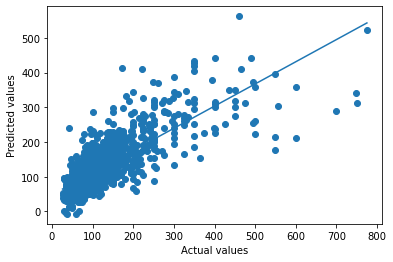

In [1649]:

plt.scatter(y_test, y_test_preds)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_test_preds, 1))(np.unique(y_test)))